## Ikeda Delay Differential Equations

In [1]:
using DifferentialEquations
using QuadGK
using Plots
using Interact
using Measures
gr()

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6424599768232621553\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5596432055992826234\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6424599768232621553\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

In [2]:
const r = 1.0
#tau = 5.0

# Define the nonlinear function
###
function f(x)
   sin(x)
end

function ikedadde(du,u,h,p,t)
du[1] = -r*f(h(p,t-p[1])[1])
end

# Initial function
init_x(x)=0.1*sin(x)
h(p, t) = [init_x(t)]
u0 = [init_x(0)]

h(p, t) = ones(1)
u0 = [1.0]
## Initial function

p=[5.5]
lags = [p[1]]
tspan = (0.0,250.0)

prob = DDEProblem(ikedadde,u0,h,tspan,p; constant_lags=lags)

#sol = solve(prob)
alg = MethodOfSteps(Tsit5())
sol = solve(prob,alg,reltol=1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 488-element Array{Float64,1}:
   0.0               
   1.1883951057781212
   5.5               
   6.42745069918712  
   6.84215173257951  
   7.735782724801135 
   8.150748983060435 
   8.753462722939465 
   9.257447919955696 
   9.816798179821447 
  10.374341308442778 
  11.0               
  11.593855352544193 
   ⋮                 
 246.15479953328753  
 246.57507335689792  
 246.9252705815194   
 247.2691060283489   
 247.62487463792624  
 248.00287025458374  
 248.33526527629016  
 248.70136419386796  
 249.09415869122236  
 249.59138043299663  
 249.9846591609373   
 250.0               
u: 488-element Array{Array{Float64,1},1}:
 [1.0]        
 [2.44955e-16]
 [-3.62809]   
 [-4.14586]   
 [-4.16446]   
 [-3.74195]   
 [-3.38261]   
 [-2.78858]   
 [-2.32385]   
 [-1.94833]   
 [-1.79855]   
 [-1.93549]   
 [-2.31766]   
 ⋮            
 [0.978249]   
 [0.580687]   
 [0.23295]    
 [-0.0822949] 
 [-0.353

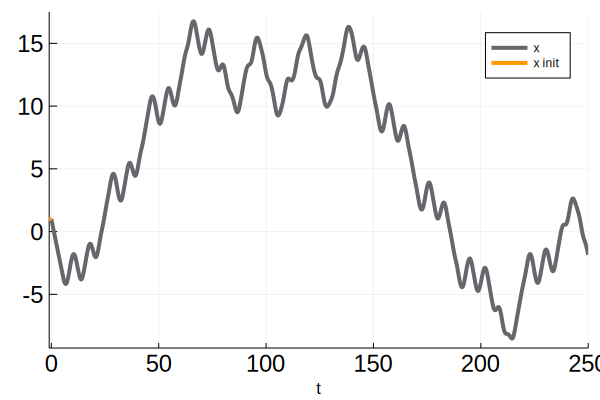

In [3]:
plot(sol,
    vars=(0,1),
    linewidth=4,
    color="#6a656d",
    label="x",
    xtickfont = font(16),
#    xticks = 0:2:200,
    ytickfont = font(16)) # legend=false
x = range(-1,stop=0,length=10)
plot!(x,x->1.0,
    linewidth=4,
    color="#FF9900",label="x init")
plot!(xlim=(-1,250))

In [4]:
anim=@animate for i=1:250
tspan = (0.0,i*1.0)
p=[5.5]
prob = DDEProblem(ikedadde,u0,h,tspan,p; constant_lags=lags)
    
sol = solve(prob,alg,reltol=1e-6);
    
theme(:default)
plot(sol,
    vars=(0,1),
    linewidth=4,
    color="#6a656d",
    label="",
    xtickfont = font(16),
    xticks = 0:50:240,
#    xlim=(0,250),
    ylim=(-10,20),
    ytickfont = font(16)) 
x = range(-1,stop=0,length=10)
plot!(x,x->1.0,
    linewidth=4,
    color="#FF9900",
        label=""
    )
plot!(xlim=(-1,250))
end

Animation("/var/folders/p6/2y21smx94031_tp3fny44xn40000gn/T/tmpxoPLyE", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000241.png", "000242.png", "000243.png", "000244.png", "000245.png", "000246.png", "000247.png", "000248.png", "000249.png", "000250.png"])

In [5]:
gif(anim, "anim.gif", fps = 20)

┌ Info: Saved animation to 
│   fn = /Users/ynakata/Box Sync/Program/Julia_MacbookPro/ScalarDDE/anim.gif
└ @ Plots /Users/ynakata/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/ynakata/Box Sync/Program/Julia_MacbookPro/ScalarDDE/anim.gif")

In [6]:
anim=@animate for i=0:20
    
p=[i*0.5]

prob = DDEProblem(ikedadde,u0,h,tspan,p; constant_lags=lags)

sol = solve(prob,alg,reltol=1e-6)
    
plot(sol,
    vars=(0,1),
    linewidth=4,
    color="#6a656d",
    xtickfont = font(16),
    legendtitle="tau=$(i*0.5)",
    label="",
    ytickfont = font(16),
    legendfontsize=12) # legend=false
x = range(-1,stop=0,length=10)
plot!(x,x->1.0,
    linewidth=4,
    color="#FF9900",
        label=""
    )
plot!(xlim=(-1,100))
end

Animation("/var/folders/p6/2y21smx94031_tp3fny44xn40000gn/T/tmp5mnBUH", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000012.png", "000013.png", "000014.png", "000015.png", "000016.png", "000017.png", "000018.png", "000019.png", "000020.png", "000021.png"])

In [7]:
gif(anim, "anim_delay.gif", fps = 1)

┌ Info: Saved animation to 
│   fn = /Users/ynakata/Box Sync/Program/Julia_MacbookPro/ScalarDDE/anim_delay.gif
└ @ Plots /Users/ynakata/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/ynakata/Box Sync/Program/Julia_MacbookPro/ScalarDDE/anim_delay.gif")